In [1]:
import numpy as np
import numpy.linalg as npl
import scipy.linalg as spl
import sklearn.metrics as sklm
import math
import matplotlib.pyplot as plt
import pandas as pd #for debugging
plt.rcParams['figure.figsize'] = [6, 6]
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 16.1 Constrained Least Squares

In [2]:
# Julia cls_solve implementation from https://github.com/VMLS-book/VMLS.jl/blob/master/src/VMLS.jl
#function cls_solve(A,b,C,d)
#     m, n = size(A)
#     p, n = size(C)
#     Q, R = qr([A; C])
#     Q = Matrix(Q)
#     Q1 = Q[1:m,:]
#     Q2 = Q[m+1:m+p,:]
#     Qtil, Rtil = qr(Q2')
#     Qtil = Matrix(Qtil)
#     w = Rtil \ (2*Qtil'*Q1'*b - 2*(Rtil'\d))
#     return R \ (Q1'*b - Q2'*w/2)
# end

In [3]:
def cls_solve(A,b,C,d):
    m,n = np.shape(A)
    p,n = np.shape(C)
    Q,R = npl.qr(np.vstack([A,C]))
    Q1 = Q[0:m,:]
    Q2 = Q[m:m+p,:]
    Qtil, Rtil = npl.qr(Q2.T)
    first = np.vstack(np.matmul(np.matmul(2*Qtil.T , Q1.T),b))
    denom = first - np.vstack((2*(npl.lstsq(Rtil.T,d)[0])))
    w = npl.lstsq(Rtil, denom)[0]
    return npl.lstsq(R,np.vstack(np.matmul(Q1.T,b)) - np.matmul(Q2.T , w)/2)[0]

In [4]:
M = 70
N = 2*M
xleft, xright = np.random.rand(M) - 1, np.random.rand(M)
x = np.vstack(np.block([xleft,xright]))
y = x**3 - x + .4 /(1+(25*(np.square(x))))+np.vstack(.05*np.random.randn(N))
n = 4
A = np.vstack([(np.hstack([np.flip(np.vander(xleft,n),1),np.zeros((M,n))])),np.hstack([np.zeros((M,n)), np.flip(np.vander(xright,n),1)])])
b = y
one = np.block([1,np.zeros((1,n-1)), -1,np.zeros((1,n-1))])
two = np.block([0,1,np.zeros((1,n-2)), 0, -1, np.zeros((1,n-2))])
C = np.vstack([one,two])
d = np.zeros((2,1))

In [5]:
theta = cls_solve(A,b,C,d)
Npl = 200
xpl_left = np.linspace(-1,0,Npl) #continuity constraint 1
ypl_left = np.matmul(np.flip(np.vander(xpl_left,4),1) , theta[0:n])
xpl_right = np.linspace(0,1,Npl) #continuity constraint 2
ypl_right = np.matmul(np.flip(np.vander(xpl_right,4),1),theta[n:])

/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':
/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.
/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`

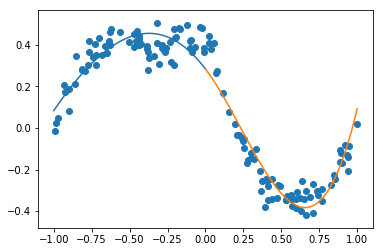

In [6]:
plt.scatter(x,y)
plt.plot(xpl_left,ypl_left)
plt.plot(xpl_right,ypl_right)

In [7]:
#recall advertising budget problem on section 12.4:
R = np.vstack([[.97,1.86,.41],[1.23,2.18,.53],[.8,1.24,.62],[1.29,.98,.51],[1.1,1.23,.69],[.67,.34,.54],[.87,.26,.62],[1.1,.16,.48],[1.92,.22,.71],[1.29,.12,.62]])
m,n = np.shape(R)
vdes = 1e3 * np.ones(m)
s = npl.lstsq(R,vdes)[0]
s

/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


array([  62.07662454,   99.98500403, 1442.83746254])

In [8]:
#one can add a total budget constraint given these tools:
cls_solve(R,vdes, np.ones((1,n)), np.vstack([1284]))

/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':
/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.
/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`

array([[315.16818459],
       [109.86643348],
       [858.96538193]])

In [9]:
#minimum norm force sequence
A,b = np.eye(10),np.zeros((10,1))
C = np.vstack([np.ones((1,10)),np.linspace(9.5,.5,10)])
d = np.vstack([0,1])
fln = cls_solve(A,b,C,d)
fln

/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':
/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.
/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`

array([[ 0.05454545],
       [ 0.04242424],
       [ 0.03030303],
       [ 0.01818182],
       [ 0.00606061],
       [-0.00606061],
       [-0.01818182],
       [-0.03030303],
       [-0.04242424],
       [-0.05454545]])

# 16.2 Solution

In [10]:
A,b,C,d = np.random.randn(10,5),np.random.randn(10),np.random.randn(2,5),np.random.randn(2)

In [11]:
def cls_solve_kkt(A,b,C,d):
    m,n = np.shape(A)
    p,n = np.shape(C)
    G = np.matmul(A.T,A) #Gram
    KKT = np.vstack([np.hstack([2*G, C.T]),np.hstack([C,np.zeros((p,p))])])
    xzhat = np.vstack(npl.lstsq(KKT,np.hstack([np.matmul(2*A.T,b),d]))[0])
    return xzhat[0:n,:]

In [12]:
x = cls_solve_kkt(A,b,C,d)
np.matmul(C,x) - np.vstack(d) #residual small

/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([[3.33066907e-16],
       [0.00000000e+00]])

# 16.3 Solving Constrained Least Squares Problems

In [13]:
def cls_solve(A,b,C,d):
    m,n = np.shape(A)
    p,n = np.shape(C)
    Q,R = npl.qr(np.vstack([A,C]))
    Q1 = Q[0:m,:]
    Q2 = Q[m:m+p,:]
    Qtil, Rtil = npl.qr(Q2.T)
    first = np.vstack(np.matmul(np.matmul(2*Qtil.T , Q1.T),b)) #splitting line below for readability
    denom = first - np.vstack((2*(npl.lstsq(Rtil.T,d)[0]))) #splitting line below for readability
    w = npl.lstsq(Rtil, denom)[0]
    return npl.lstsq(R,np.vstack(np.matmul(Q1.T,b)) - np.matmul(Q2.T , w)/2)[0]

m,n,p = 10,5,2
A,b,C,d = np.random.randn(m,n), np.random.randn(m),np.random.randn(p,n),np.random.randn(p)
xKKT = cls_solve_kkt(A,b,C,d)
xQR = cls_solve(A,b,C,d)
xKKT
xQR

/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':
/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To 

array([[-0.51502093],
       [ 0.08329317],
       [-0.07127897],
       [-0.0212267 ],
       [ 0.28312582]])

array([[-0.51502093],
       [ 0.08329317],
       [-0.07127897],
       [-0.0212267 ],
       [ 0.28312582]])

In [14]:
npl.norm(xKKT-xQR) #small residual

1.2842953525656932e-15

In [15]:
#sparse constrained least squares
def cls_solve_sparse(A,b,C,d):
    m,n = np.shape(A)
    p,n = np.shape(C)
    one = np.hstack([np.zeros((n,n)),A.T, C.T])
    two = np.hstack([A, -np.eye(np.shape(A)[0])/2, np.zeros((m,p))]) #2nd object written in J as -I/2, wow
    three = np.hstack([C, np.zeros((p,m)), np.zeros((p,p))])
    bigA = np.vstack([one,two,three])
    xyzhat = npl.lstsq(bigA,np.vstack([np.zeros((n,1)),np.vstack(b),np.vstack(d)]))[0]
    xhat = xyzhat[:n]
    return xhat
    
m,n,p = 100,50,10
A,b,C,d = np.random.randn(m,n), np.random.randn(m),np.random.randn(p,n),np.random.randn(p)
x1 = cls_solve(A,b,C,d)
x2 = cls_solve_sparse(A,b,C,d)
npl.norm(x1-x2)

/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':
/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.
/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`

1.6527135367200973e-14

In [16]:
p,n = 50,500
C = np.random.randn(p,n)
d = np.random.randn(p)

In [17]:
x1 = np.vstack(npl.lstsq(C,d)[0])
x2 = cls_solve(np.eye(n), np.zeros((n,1)), np.vstack(C), np.vstack(d))
x3 = np.vstack(np.matmul(npl.pinv(C),d))
x1[:3]
x2[:3]
x3[:3]

/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.
/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':
/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` whe

array([[0.02259717],
       [0.01777961],
       [0.01198172]])

array([[0.02259717],
       [0.01777961],
       [0.01198172]])

array([[0.02259717],
       [0.01777961],
       [0.01198172]])

In [18]:
npl.norm(x1-x2)
npl.norm(x2-x3)

3.474569285686952e-15

3.5015696962894202e-15